[View in Colaboratory](https://colab.research.google.com/github/stanimman/Simple/blob/master/Dog_Breed_Dataset.ipynb)

In [1]:
!apt-get install  -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [2]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

tcmalloc: large alloc 1073750016 bytes == 0x5b45e000 @  0x7f07b961b1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.4.0
True


In [4]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.139 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9,ta;q=0.8" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/7327/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528954296&Signature=Pz4fF%2BBsrQtiVYmSarQfDUVxQoaGtpdoWsmALfiFPEL8gLSdeaAV4%2F7SftT4%2B9uX9lsMDzMPYqLLg9spkqzZWpPrCR%2FL0x8Rhdz%2B%2BrcjV8ljbiMZuarI6RqJSPMtcCDLRBDtk9p4dkAg6RUChSW3qPRrhS0Dy0Mf8uhrFa3jy%2F1u6ZG1lhZRfH62ZEpA%2FD%2F1rTjSrA5tm398%2F6Pc1j%2F3jsbDec1XSzgy5fsjy%2FZiWcYkzBqq%2BpHDdXwx3t%2B89nI8IMSdyTP973TMGk5VcpRJyTmAW13KqUvYaq2%2BfK1XFqffs45G5c%2FGSYOg5mQ2diq9wVMP8V7mmPSM63Jyq7cx0g%3D%3D" -O "train.zip" -c

--2018-06-11 05:32:23--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/7327/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528954296&Signature=Pz4fF%2BBsrQtiVYmSarQfDUVxQoaGtpdoWsmALfiFPEL8gLSdeaAV4%2F7SftT4%2B9uX9lsMDzMPYqLLg9spkqzZWpPrCR%2FL0x8Rhdz%2B%2BrcjV8ljbiMZuarI6RqJSPMtcCDLRBDtk9p4dkAg6RUChSW3qPRrhS0Dy0Mf8uhrFa3jy%2F1u6ZG1lhZRfH62ZEpA%2FD%2F1rTjSrA5tm398%2F6Pc1j%2F3jsbDec1XSzgy5fsjy%2FZiWcYkzBqq%2BpHDdXwx3t%2B89nI8IMSdyTP973TMGk5VcpRJyTmAW13KqUvYaq2%2BfK1XFqffs45G5c%2FGSYOg5mQ2diq9wVMP8V7mmPSM63Jyq7cx0g%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 361279070 (345M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 344.54M   133MB/s    in 2.6s    

2018-06-11 05:32:25 (133 MB/s) - ‘

In [5]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.139 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9,ta;q=0.8" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/7327/labels.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528954407&Signature=PEIDp65benDRVYwFa%2BFM5nvsakmnk4ewNXuIbOGVmQGxI42eGLLI48YHNI7OYsIkHgSiSOHlkIwf6zavxi4hkQ%2Fyqkv%2BkIRfxzQaYepxjTqqTrrBHJ3%2F5iixQ%2Bo2B94P0swQ8YxeU3DcP6IQ4tho1gGNc4hB4XB3OrJpludUicQi3LtbKNNzLPc7T7hQiu2B0WxTgq7d3go6fzuNQs4UTk%2B5J4E2bsiqGrp356%2FsXe3QyAKPfEfOBrpKeSrsFpnal1gb7KegiUO0rKttYt27xBOmhWNtnDowGvfcQ7yOBE0n83UFORzZe7OTHIFE%2FLd%2B4q4zaKMyHqSLO4XCsCj%2BQQ%3D%3D" -O "labels.csv.zip" -c

--2018-06-11 05:34:04--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/7327/labels.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528954407&Signature=PEIDp65benDRVYwFa%2BFM5nvsakmnk4ewNXuIbOGVmQGxI42eGLLI48YHNI7OYsIkHgSiSOHlkIwf6zavxi4hkQ%2Fyqkv%2BkIRfxzQaYepxjTqqTrrBHJ3%2F5iixQ%2Bo2B94P0swQ8YxeU3DcP6IQ4tho1gGNc4hB4XB3OrJpludUicQi3LtbKNNzLPc7T7hQiu2B0WxTgq7d3go6fzuNQs4UTk%2B5J4E2bsiqGrp356%2FsXe3QyAKPfEfOBrpKeSrsFpnal1gb7KegiUO0rKttYt27xBOmhWNtnDowGvfcQ7yOBE0n83UFORzZe7OTHIFE%2FLd%2B4q4zaKMyHqSLO4XCsCj%2BQQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218954 (214K) [application/zip]
Saving to: ‘labels.csv.zip’

labels.csv.zip      100%[===================>] 213.82K  --.-KB/s    in 0.003s  

2018-06-11 05:34:04 (60.8 MB/s) - ‘labe

In [7]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.139 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9,ta;q=0.8" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/7327/sample_submission.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528954532&Signature=ApwmqO2AKkKhVg%2Bea7ccKgJeacAdhDIrOl7oIg7GAu6lEJ5bb52Ga%2Fzhe3oe5CeUKPX6VPPvcdUx0uFx5CpCk%2FvpQaVfvSSHt%2BPURCesvcAyDuwdxaAmybydA%2B%2BSPxah1SUdeFiKPz8x%2BI2N0PfiZaG3Lrv%2BhD62eYbRp8%2B7ttvQFehbksvF6m0ow5uHA2mlCMhDoNU5f7C8QMPax%2Fz3wH0jbFYQGF4j8XMooyeu%2BCcJ%2FEgz7iM5Omj5ck0ykuttCP%2BqRVWVaeN6KevmnisA1RsIoQmkfE7%2FBVvZToYuorF8Rew9MSV5lnRsVoRjpVhsIBRO9%2Fecl7eg%2Fe1CAGeJjQ%3D%3D" -O "sample_submission.csv.zip" -c

--2018-06-11 05:35:57--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/7327/sample_submission.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528954532&Signature=ApwmqO2AKkKhVg%2Bea7ccKgJeacAdhDIrOl7oIg7GAu6lEJ5bb52Ga%2Fzhe3oe5CeUKPX6VPPvcdUx0uFx5CpCk%2FvpQaVfvSSHt%2BPURCesvcAyDuwdxaAmybydA%2B%2BSPxah1SUdeFiKPz8x%2BI2N0PfiZaG3Lrv%2BhD62eYbRp8%2B7ttvQFehbksvF6m0ow5uHA2mlCMhDoNU5f7C8QMPax%2Fz3wH0jbFYQGF4j8XMooyeu%2BCcJ%2FEgz7iM5Omj5ck0ykuttCP%2BqRVWVaeN6KevmnisA1RsIoQmkfE7%2FBVvZToYuorF8Rew9MSV5lnRsVoRjpVhsIBRO9%2Fecl7eg%2Fe1CAGeJjQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288160 (281K) [application/zip]
Saving to: ‘sample_submission.csv.zip’

sample_submission.c 100%[===================>] 281.41K  --.-KB/s    in 0.006s  

2018-

In [0]:
!unzip labels.csv.zip
!unzip train.zip

In [8]:
!unzip sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [0]:
!cd train

In [0]:
!ls /content/train

In [0]:
#%matplotlib inline
import time
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser

import torch
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, datasets, models

In [14]:
INPUT_SIZE = 224
NUM_CLASSES = 120
data_dir = '/content'
labels = pd.read_csv(join(data_dir, 'labels.csv'))
sample_submission = pd.read_csv(join(data_dir, 'sample_submission.csv'))
print(len(listdir(join(data_dir, 'train'))), len(labels))
#print(len(listdir(join(data_dir, 'test'))), len(sample_submission))

10222 10222


In [15]:
selected_breed_list = list(labels.groupby('breed').count().sort_values(by='id', ascending=False).head(NUM_CLASSES).index)
labels = labels[labels['breed'].isin(selected_breed_list)]
labels['target'] = 1
labels['rank'] = labels.groupby('breed').rank()['id']
labels_pivot = labels.pivot('id', 'breed', 'target').reset_index().fillna(0)

train = labels_pivot.sample(frac=0.8)
valid = labels_pivot[~labels_pivot['id'].isin(train['id'])]
print(train.shape, valid.shape) # The shape is 121 because 120 class + Id (Column)

(8178, 121) (2044, 121)


In [44]:
print(train.iloc[0].unique())

['8d59450a985ebb3790c70d672e616c68' 0.0 1.0]


In [0]:
class DogsDataset(Dataset):
    def __init__(self, labels, root_dir, subset=False, transform=None):
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        img_name = '{}.jpg'.format(self.labels.iloc[idx, 0])
        fullname = join(self.root_dir, img_name)
        image = Image.open(fullname)
        labels = self.labels.iloc[idx, 1:].as_matrix().astype('float')
        labels = np.argmax(labels)
        if self.transform:
            image = self.transform(image)
        return [image, labels]

In [0]:
TRAIN_IMG_PATH = "/content/train"
#TEST_IMG_PATH = "/content/test"
LABELS_CSV_PATH = "/content/labels.csv"
SAMPLE_SUB_PATH = "/content/sample_submission.csv"

In [45]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
ds_trans = transforms.Compose([transforms.Scale(224),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               normalize])
train_ds = DogsDataset(train, TRAIN_IMG_PATH, transform=ds_trans)
valid_ds = DogsDataset(valid, TRAIN_IMG_PATH, transform=ds_trans)


train_dl = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_ds, batch_size=4, shuffle=True, num_workers=4)

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [0]:
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    axis.imshow(inp)

In [0]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    # converting tensor to numpy for displaying the image , he transforms the normalized data back actual image using same std and mean
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## There is some issue in plt version 

torch.Size([4, 3, 224, 224]) torch.Size([4])


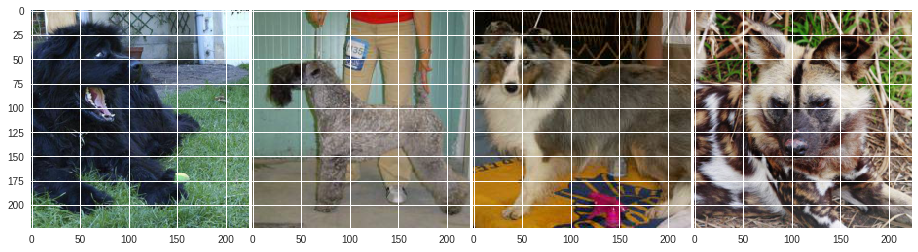

In [55]:
img, label = next(iter(train_dl))
print(img.size(), label.size())
fig = plt.figure(1, figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 4), axes_pad=0.05)    
for i in range(img.size()[0]):
    ax = grid[i]
    imshow(ax, img[i])

In [0]:
import PIL


In [0]:
## This is a weird wor around for the given problem I fased more details
#http://forums.fast.ai/t/attributeerror-module-pil-image-has-no-attribute-register-extensions/10689/19
def register_extension(id, extension):
    Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions):
    for extension in extensions:
        register_extension(id, extension)
Image.register_extensions = register_extensions

In [0]:
## This function just evaluate the loss / optimize  and returns model and the weight of the epoch which has highest accuracy
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        # In train phase they are settting 2 variable in model class - train() and schedular  = step()
        # In Validation phase setting the model class - eval()
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.# phase - train or validation
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [0]:
from torchvision import  models

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
import torch.nn as nn
import torch.optim as optim
import copy

In [0]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 120)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized / we have updated all the layer in the resnet architecture by passing model_ft.parameters()
#to the optimizer , again SGD with momentum is preferred over Adam ?? 
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [0]:
dataloaders = {"train": train_dl, "val": valid_dl}


In [0]:
dataset_sizes = {"train": len(train_ds),"val":len(valid_ds)}

In [70]:
print(dataset_sizes)

{'train': 8178, 'val': 2044}


In [71]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------
train Loss: 1.7419 Acc: 0.5141
val Loss: 1.4393 Acc: 0.5915

Epoch 1/4
----------
train Loss: 1.2740 Acc: 0.6387
val Loss: 1.4389 Acc: 0.6062

Epoch 2/4
----------
train Loss: 0.9212 Acc: 0.7381
val Loss: 1.4946 Acc: 0.5954

Epoch 3/4
----------
train Loss: 0.6829 Acc: 0.8068
val Loss: 1.4635 Acc: 0.6228

Epoch 4/4
----------
train Loss: 0.4571 Acc: 0.8796
val Loss: 1.4691 Acc: 0.6389

Training complete in 10m 52s
Best val Acc: 0.638943


In [0]:
# I am just going to touch the last layer keeping rest of the weight same by make param.requires_grad = False (No gradient will flow)
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 120)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opoosed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [75]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 1.0407 Acc: 0.7181
val Loss: 0.8017 Acc: 0.7710

Epoch 1/24
----------
train Loss: 1.0139 Acc: 0.7318
val Loss: 0.8568 Acc: 0.7466

Epoch 2/24
----------
train Loss: 1.0266 Acc: 0.7249
val Loss: 0.8372 Acc: 0.7524

Epoch 3/24
----------
train Loss: 0.9959 Acc: 0.7350
val Loss: 0.8272 Acc: 0.7647

Epoch 4/24
----------
train Loss: 1.0215 Acc: 0.7224
val Loss: 0.8337 Acc: 0.7539

Epoch 5/24
----------
train Loss: 1.0060 Acc: 0.7316
val Loss: 0.8088 Acc: 0.7593

Epoch 6/24
----------
train Loss: 1.0181 Acc: 0.7289
val Loss: 0.8101 Acc: 0.7568

Epoch 7/24
----------
train Loss: 1.0248 Acc: 0.7265
val Loss: 0.8166 Acc: 0.7593

Epoch 8/24
----------
train Loss: 1.0273 Acc: 0.7181
val Loss: 0.8083 Acc: 0.7622

Epoch 9/24
----------
train Loss: 1.0193 Acc: 0.7255
val Loss: 0.7910 Acc: 0.7681

Epoch 10/24
----------
train Loss: 1.0224 Acc: 0.7325
val Loss: 0.7906 Acc: 0.7701

Epoch 11/24
----------
train Loss: 1.0240 Acc: 0.7235
val Loss: 0.8111 Acc: 0.7554

Ep